# FFT Application: Image editing
In this Jupyter notebook we will remove image errors from pictures that were taken 1966 during the lunar orbiter mission.

Here some basic imports and functions:

In [1]:
import numpy as np
from numpy import sin, cos, exp, pi
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import ceil, floor
from numpy.fft import fft2, ifft2
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (10,10)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def center_spectrum(f_image):
    f_image = np.roll(f_image, f_image.shape[0]//2, axis=0)
    f_image = np.roll(f_image, f_image.shape[1]//2, axis=1)
    return f_image

def zoom_spectrum(f_image, x_down=250, x_up=250, y_down=300, y_up=300):
    return f_image[(f_image.shape[0]//2-y_down):(f_image.shape[0]//2+y_up),
                   (f_image.shape[1]//2-x_down):(f_image.shape[1]//2+x_up)]

def plot_spectrum(f_image, title, zoom=False):
    from matplotlib.colors import LogNorm # logarithmic colormap
    f_image = center_spectrum(f_image)
    if zoom:
        f_image = zoom_spectrum(f_image)
    plt.title(title)
    plt.imshow(np.abs(f_image), norm=LogNorm(vmin=5))
    plt.colorbar()
    
def plot_image(image, title=''):
    plt.figure()
    plt.imshow(image, plt.cm.gray)
    plt.title(title)
    plt.show()
    
def plot_images(image1, title1, image2, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 20))
    ax1.imshow(image1, plt.cm.gray)
    ax1.set_title(title1)
    ax2.imshow(image2, plt.cm.gray)
    ax2.set_title(title2)
    plt.show()
    
def remove_lines(f_image, border=1, treshold=1e3, keep_u=5, keep_d=5):
    f_image2 = f_image.copy()
    f_image_cut = np.where(np.abs(f_image2)<treshold, f_image2, f_image2/np.abs(f_image2)*treshold)
    #f_image_cut = np.where(np.abs(f_image2)>treshold, f_image2, 0)
    r, c = f_image2.shape
    #f_image2 = np.zeros(f_image.shape)
    f_image2[:,0:border] = f_image_cut[:,0:border]
    f_image2[:,(c-border):c] = f_image_cut[:,(c-border):c]
    keep = list(range(0, keep_d)) + list(range(f_image.shape[0]-keep_u,f_image.shape[0]))
    f_image2[keep,:] = f_image[keep,:]
    return f_image2

First load the original image:

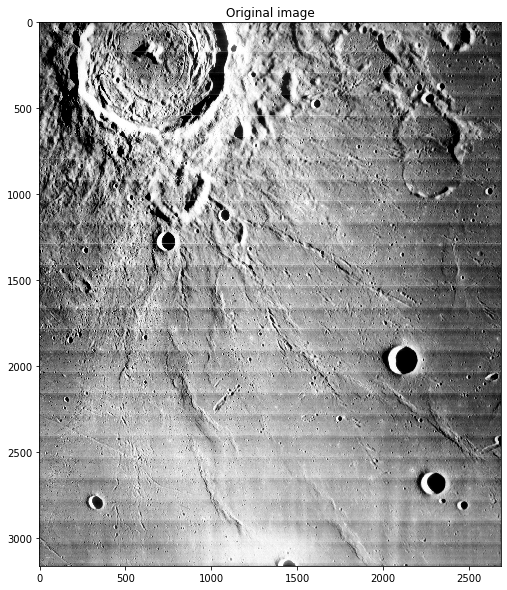

In [2]:
image = plt.imread(r'moon\moon_1.png').astype(float)
image = rgb2gray(image)
plot_image(image, title='Original image')

Now we use Fast Fourier Transform to calculate the frequency spectrum of the image:

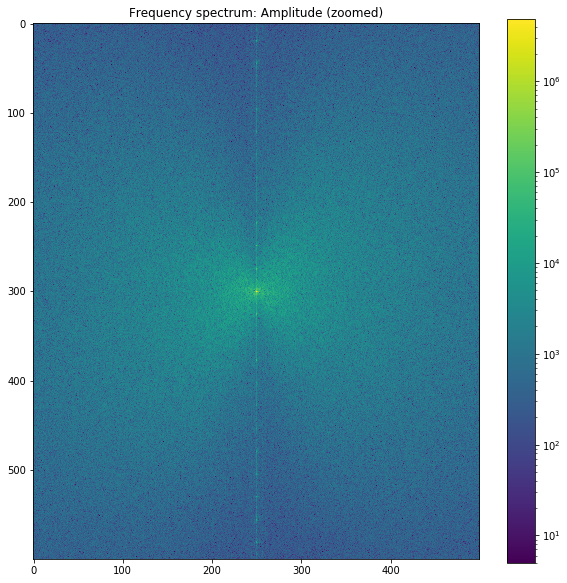

In [3]:
f_image = fft2(image)
plot_spectrum(f_image, 'Frequency spectrum: Amplitude (zoomed)', zoom=True)

The vertical line in the frequency spectrum corresponds to the horizontal lines in the picture.

So we remove it but keep the center of the spectrum, because it contains important information:

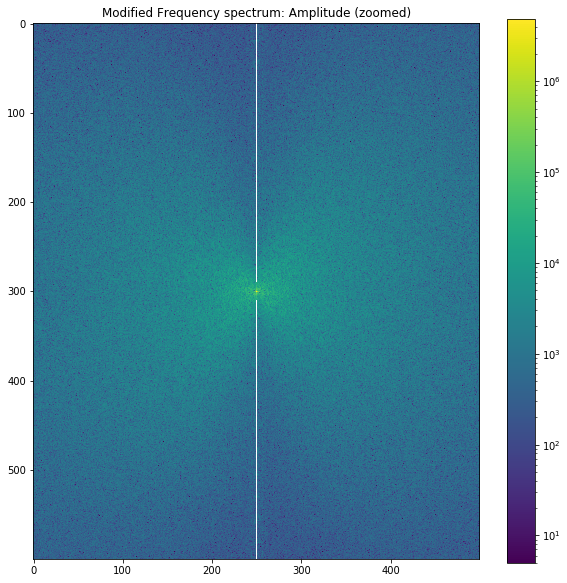

In [4]:
f_image_filtered = remove_lines(f_image, border=1, treshold=0, keep_u=10, keep_d=10)
plot_spectrum(f_image_filtered, 'Modified Frequency spectrum: Amplitude (zoomed)', zoom=True)

Transform the frequency spectrum back to the filtered image:

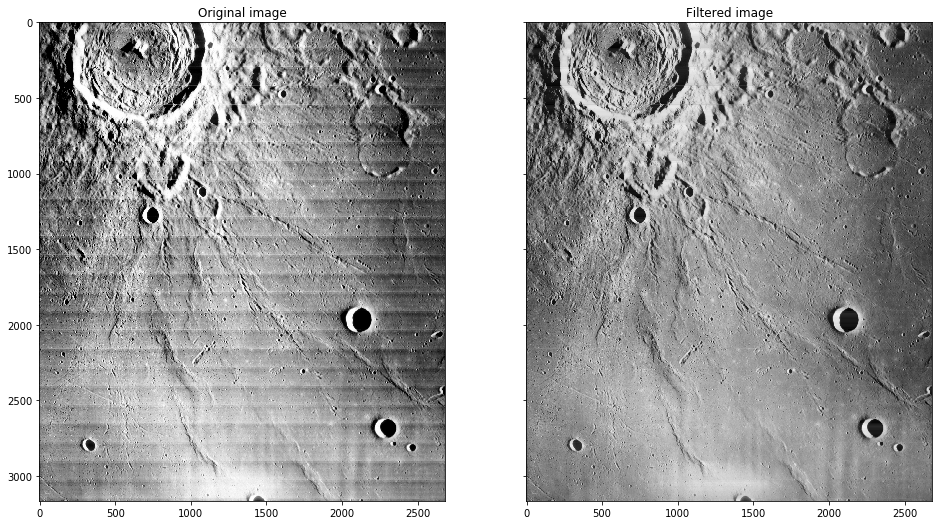

In [5]:
image_filtered = ifft2(f_image_filtered).real
plot_images(image, 'Original image', image_filtered, 'Filtered image')

Feel free to do the same with other images in the `/moon` directory.

*All pictures: (c) 1966 by Dave Williams (NASA), edited*